#### Cleaning and importing data from http://web.mta.info/developers/turnstile.html
The data is collected from July 3, 2021 - Sep 25, 2021

In [342]:
import pandas as pd  
import datetime 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import datetime 

In [133]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210703,210710,210717,210724,210731,210807,210814,210821,210828,210904,210911,210918,210925]
turnstiles_mta = get_data(week_nums) 

In [134]:
turnstiles_mta.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,20:00:00,REGULAR,7593116,2595809
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/27/2021,00:00:00,REGULAR,7593175,2595818
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/27/2021,04:00:00,REGULAR,7593182,2595820
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/27/2021,08:00:00,REGULAR,7593188,2595827
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/27/2021,12:00:00,REGULAR,7593227,2595880


In [135]:
turnstiles_mta.tail(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
210390,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/23/2021,09:00:00,REGULAR,5554,645
210391,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/23/2021,13:00:00,REGULAR,5554,645
210392,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/23/2021,17:00:00,REGULAR,5554,645
210393,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/23/2021,21:00:00,REGULAR,5554,645
210394,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,01:00:00,REGULAR,5554,645
210395,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,05:00:00,REGULAR,5554,645
210396,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,09:00:00,REGULAR,5554,645
210397,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,13:00:00,REGULAR,5554,645
210398,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,17:00:00,REGULAR,5554,646
210399,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,21:00:00,REGULAR,5554,646


In [136]:
turnstiles_mta.info

<bound method DataFrame.info of           C/A  UNIT       SCP        STATION LINENAME DIVISION        DATE  \
0        A002  R051  02-00-00          59 ST  NQR456W      BMT  06/26/2021   
1        A002  R051  02-00-00          59 ST  NQR456W      BMT  06/26/2021   
2        A002  R051  02-00-00          59 ST  NQR456W      BMT  06/26/2021   
3        A002  R051  02-00-00          59 ST  NQR456W      BMT  06/26/2021   
4        A002  R051  02-00-00          59 ST  NQR456W      BMT  06/26/2021   
...       ...   ...       ...            ...      ...      ...         ...   
210395  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  09/24/2021   
210396  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  09/24/2021   
210397  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  09/24/2021   
210398  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  09/24/2021   
210399  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  09/24/2021   

            TIME     DESC  ENTR

In [137]:
# Three months of Data
turnstiles_mta.DATE.value_counts().sort_index()

06/26/2021    29965
06/27/2021    29840
06/28/2021    29814
06/29/2021    29843
06/30/2021    29883
              ...  
09/20/2021    30444
09/21/2021    30082
09/22/2021    30014
09/23/2021    30033
09/24/2021    29899
Name: DATE, Length: 91, dtype: int64

In [138]:
turnstiles_mta.isnull()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
210395,False,False,False,False,False,False,False,False,False,False,False
210396,False,False,False,False,False,False,False,False,False,False,False
210397,False,False,False,False,False,False,False,False,False,False,False
210398,False,False,False,False,False,False,False,False,False,False,False


In [139]:
turnstiles_mta.isnull().any()

C/A                                                                     False
UNIT                                                                    False
SCP                                                                     False
STATION                                                                 False
LINENAME                                                                False
DIVISION                                                                False
DATE                                                                    False
TIME                                                                    False
DESC                                                                    False
ENTRIES                                                                 False
EXITS                                                                   False
dtype: bool

In [140]:
turnstiles_mta.isnull().sum().sum()    # Now I sure there are not any missing values

0

In [141]:
# remove duplicate data  

turnstiles_mta.drop_duplicates(subset="C/A",keep = False)
turnstiles_mta 
## As noted there is not duplicate data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791
...,...,...,...,...,...,...,...,...,...,...,...
210395,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,05:00:00,REGULAR,5554,645
210396,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,09:00:00,REGULAR,5554,645
210397,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,13:00:00,REGULAR,5554,645
210398,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,17:00:00,REGULAR,5554,646


#### Here I create 2 new columns: 
1- DATE_TIME for the time operations .
2- TURNSTILE which is contain all information about the entry door. 

In [142]:
import datetime 

In [143]:
turnstiles_mta["DATE_TIME"]= pd.to_datetime(turnstiles_mta.DATE + " " + turnstiles_mta.TIME, format= "%m/%d/%Y %H:%M:%S")
turnstiles_mta['TURNSTILE'] = turnstiles_mta['C/A'] + '-' + turnstiles_mta['UNIT'] + '-' + turnstiles_mta['SCP']

In [144]:
turnstiles_mta.head()    # As noted two new columns has been created 

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706,2021-06-26 00:00:00,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713,2021-06-26 04:00:00,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729,2021-06-26 08:00:00,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762,2021-06-26 12:00:00,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791,2021-06-26 16:00:00,A002-R051-02-00-00


In [145]:
turnstiles_mta.columns    # So here I got the new column 

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'DATE_TIME', 'TURNSTILE'],
      dtype='object')

In [146]:
turnstiles_mta.rename(columns={'EXITS                                                               ':'EXITS'}, inplace=True)

In [147]:
turnstiles_mta.columns   #check if the rename done

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME', 'TURNSTILE'],
      dtype='object')

In [191]:
print('Descriptions of entries:' )
print(turnstiles_mta['ENTRIES'].describe() )
print('Descriptions of exits:')
print(turnstiles_mta['EXITS'].describe() )

Descriptions of entries:
count    2.724418e+06
mean     4.148078e+07
std      2.181339e+08
min      0.000000e+00
25%      2.198380e+05
50%      1.396824e+06
75%      5.997710e+06
max      2.147407e+09
Name: ENTRIES, dtype: float64
Descriptions of exits:
count    2.724418e+06
mean     3.317211e+07
std      1.916161e+08
min      0.000000e+00
25%      1.027980e+05
50%      8.526620e+05
75%      3.971601e+06
max      2.133797e+09
Name: EXITS, dtype: float64


In [356]:
# group data by turnstile, sort each turnstile by datetime
# Create new columns ENTRIES_diff and EXITS_diff for each unique turnstile
# turn cumulative counts into counts per interval

turnstiles_mtaSorted = turnstiles_mta.sort_values(['TURNSTILE', 'DATE_TIME'])
turnstiles_mtaSorted = turnstiles_mtaSorted.reset_index(drop = True)

turnstile_grouped = turnstiles_mtaSorted.groupby(['TURNSTILE'])

turnstiles_mtaSorted['ENTRIES_diff'] = turnstile_grouped['ENTRIES'].transform(pd.Series.diff)
turnstiles_mtaSorted['EXITS_diff'] = turnstile_grouped['EXITS'].transform(pd.Series.diff)

turnstiles_mtaSorted.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE,ENTRIES_diff,EXITS_diff
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706,2021-06-26 00:00:00,A002-R051-02-00-00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713,2021-06-26 04:00:00,A002-R051-02-00-00,12.0,7.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729,2021-06-26 08:00:00,A002-R051-02-00-00,12.0,16.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762,2021-06-26 12:00:00,A002-R051-02-00-00,54.0,33.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791,2021-06-26 16:00:00,A002-R051-02-00-00,122.0,29.0


In [303]:
# check distribution of
print('Descriptions of entries_diff:')
print(turnstiles_mtaSorted['ENTRIES_diff'].describe())
print('')
print('Descriptions of exits_diff:')
print(turnstiles_mtaSorted['EXITS_diff'].describe())

Descriptions of entries_diff:
count    2.719390e+06
mean     5.562453e+01
std      2.274684e+06
min     -1.383110e+09
25%      3.000000e+00
50%      2.600000e+01
75%      8.300000e+01
max      1.889997e+09
Name: ENTRIES_diff, dtype: float64

Descriptions of exits_diff:
count    2.719390e+06
mean     6.139490e+02
std      3.536455e+06
min     -2.133741e+09
25%      5.000000e+00
50%      3.000000e+01
75%      9.100000e+01
max      2.133741e+09
Name: EXITS_diff, dtype: float64


In [283]:
# check for negative values , number of unqiue TURNSTILE and nulls
print('Number of negative ENTRIES_diff: %d' %len(turnstiles_mtaSorted['ENTRIES_diff'][turnstiles_mtaSorted['ENTRIES_diff'] < 0]))
print('Number of negative EXITS_diff: %d' %len(turnstiles_mtaSorted['EXITS_diff'][turnstiles_mtaSorted['EXITS_diff'] < 0]))
print('Number of unqiue TURNSTILE: %d' %len(turnstiles_mtaSorted['TURNSTILE'].unique()))
print('Number of NaN rows: %d' %len(turnstiles_mtaSorted[turnstiles_mtaSorted['ENTRIES_diff'].isnull()]))

Number of negative ENTRIES_diff: 23909
Number of negative EXITS_diff: 16061
Number of unqiue TURNSTILE: 5028
Number of NaN rows: 5028


Since the maximum values are much greater than the normal values and the minimum valuesare negative, 
I must deal with them and zero them so that they do not affect the analysis .
Also the null values which is for the start

In [284]:
turnstiles_mtaSorted['ENTRIES_diff'] = turnstiles_mtaSorted['ENTRIES_diff'].fillna(0)
turnstiles_mtaSorted['EXITS_diff'] = turnstiles_mtaSorted['EXITS_diff'].fillna(0)

turnstiles_mtaSorted['ENTRIES_diff'][turnstiles_mtaSorted['ENTRIES_diff'] < 0] = 0 
turnstiles_mtaSorted['EXITS_diff'][turnstiles_mtaSorted['EXITS_diff'] < 0] = 0 

turnstiles_mtaSorted['ENTRIES_diff'][turnstiles_mtaSorted['ENTRIES_diff'] >= 6000] = 0 
turnstiles_mtaSorted['EXITS_diff'][turnstiles_mtaSorted['EXITS_diff'] >= 6000] = 0

<ipython-input-284-ef5b08e40337>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnstiles_mtaSorted['ENTRIES_diff'][turnstiles_mtaSorted['ENTRIES_diff'] < 0] = 0
<ipython-input-284-ef5b08e40337>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnstiles_mtaSorted['EXITS_diff'][turnstiles_mtaSorted['EXITS_diff'] < 0] = 0
<ipython-input-284-ef5b08e40337>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnstiles_mtaSorted['ENTRIES_d

In [285]:
# check again for negative values , number of unqiue TURNSTILE and nulls
print('Number of negative ENTRIES_diff: %d' %len(turnstiles_mtaSorted['ENTRIES_diff'][turnstiles_mtaSorted['ENTRIES_diff'] < 0]))
print('Number of negative EXITS_diff: %d' %len(turnstiles_mtaSorted['EXITS_diff'][turnstiles_mtaSorted['EXITS_diff'] < 0]))
print('Number of unqiue TURNSTILE: %d' %len(turnstiles_mtaSorted['TURNSTILE'].unique()))
print('Number of NaN rows: %d' %len(turnstiles_mtaSorted[turnstiles_mtaSorted['ENTRIES_diff'].isnull()]))

Number of negative ENTRIES_diff: 0
Number of negative EXITS_diff: 0
Number of unqiue TURNSTILE: 5028
Number of NaN rows: 0


In [286]:
#The busiest stations and turnstiles:
busiest = turnstiles_mtaSorted[['TURNSTILE','STATION', 'DATE_TIME','DATE','TIME', 'ENTRIES_diff','EXITS_diff']]
busiest['BUSY'] = busiest['ENTRIES_diff'].values + busiest['EXITS_diff'].values

del [turnstiles_mtaSorted]
busiest.shape 

<ipython-input-286-e1a5663ee627>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busiest['BUSY'] = busiest['ENTRIES_diff'].values + busiest['EXITS_diff'].values


(2724418, 8)

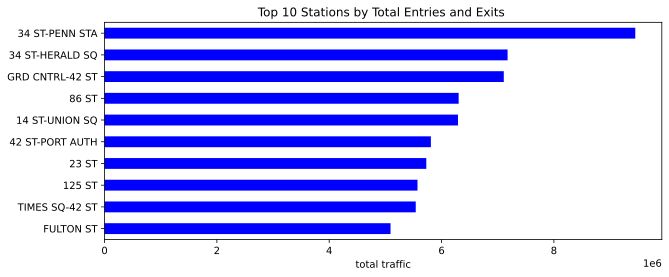

In [353]:
#Here I define busy-ness as the sum of entries and exits for each time interval (total traffic = entries + exits). 
top_10_station=busiest.groupby(['STATION']).agg({'BUSY': sum}).sort_values(by = 'BUSY', ascending = False).head(10)

fig, ax = plt.subplots(figsize=(10, 4))
top_10_station.sort_values(by = 'BUSY',ascending=True).plot(kind='barh', color ='b',ax=ax)
ax.set(title='Top 10 Stations by Total Entries and Exits ', xlabel='total traffic', ylabel='')
ax.legend().set_visible(False)

#Turnstiles at the busiest station 

#Calculating traffic per turnstile

In [287]:
mta_st_penn = busiest[busiest['STATION'] == '34 ST-PENN STA']
print('Number of TURNSTILE at 34-PENN STATION: %d' % len(mta_penn.TURNSTILE.unique()))

Number of TURNSTILE at 34-PENN STATION: 102


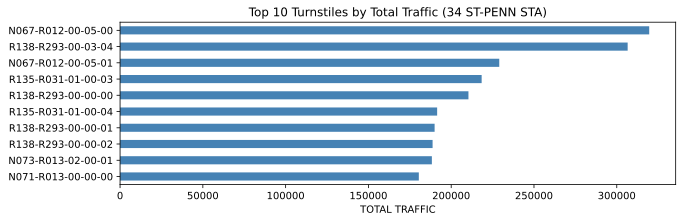

In [355]:
top10_penn_turnstile =mta_st_penn.groupby(['TURNSTILE']).agg({'BUSY': sum}).sort_values(by = 'BUSY', ascending = False).head(10)

fig, ax = plt.subplots(figsize=(10, 3))
top10_penn_turnstile.sort_values(by = 'BUSY',ascending=True).plot(kind='barh', color ='steelblue',ax=ax)
ax.set(title='Top 10 Turnstiles by Total Traffic (34 ST-PENN STA)', xlabel='TOTAL TRAFFIC', ylabel='') #y = TURNSTILE
ax.legend().set_visible(False)  

In [291]:
mta_st_penn = busiest[(busiest['STATION'] == '34 ST-PENN STA')]
mta_st_penn['DATE_TIME'] = pd.to_datetime(mta_st_penn['DATE_TIME']) # have to be datetime format so that we could resample
mta_penn_grouped = mta_st_penn.groupby(['DATE_TIME']).agg({'BUSY': sum}).sort_values(by = 'BUSY', ascending = False)
mta_penn_grouped.resample('60T',convention='end').sum().sort_values(by = 'BUSY', ascending = False).head()

<ipython-input-291-a36acaa3430b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_st_penn['DATE_TIME'] = pd.to_datetime(mta_st_penn['DATE_TIME']) # have to be datetime format so that we could resample


,BUSY
DATE_TIME,
2021-09-23 20:00:00,30811.0
2021-09-10 20:00:00,30406.0
2021-09-24 20:00:00,30097.0
2021-09-14 20:00:00,29688.0
2021-09-21 20:00:00,29657.0


# I want to analyze each month separately

In [218]:
july = (turnstiles_mta.DATE_TIME >= '2021-07-1') & (turnstiles_mta.DATE_TIME <= '2021-07-31')
turnstiles_mta[july]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE
30,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/01/2021,00:00:00,REGULAR,7595241,2596698,2021-07-01 00:00:00,A002-R051-02-00-00
31,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/01/2021,04:00:00,REGULAR,7595250,2596701,2021-07-01 04:00:00,A002-R051-02-00-00
32,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/01/2021,08:00:00,REGULAR,7595267,2596756,2021-07-01 08:00:00,A002-R051-02-00-00
33,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/01/2021,12:00:00,REGULAR,7595320,2596868,2021-07-01 12:00:00,A002-R051-02-00-00
34,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/01/2021,16:00:00,REGULAR,7595459,2596904,2021-07-01 16:00:00,A002-R051-02-00-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208576,S101A,R070,01-03-00,ST. GEORGE,1,SRT,07/31/2021,00:00:00,REGULAR,2734837,381,2021-07-31 00:00:00,S101A-R070-01-03-00
208618,S101A,R070,01-03-01,ST. GEORGE,1,SRT,07/31/2021,00:00:00,REGULAR,2330618,296,2021-07-31 00:00:00,S101A-R070-01-03-01
208660,S101A,R070,01-03-02,ST. GEORGE,1,SRT,07/31/2021,00:00:00,REGULAR,706319,86,2021-07-31 00:00:00,S101A-R070-01-03-02
208702,S101A,R070,01-05-00,ST. GEORGE,1,SRT,07/31/2021,00:00:00,REGULAR,1249,0,2021-07-31 00:00:00,S101A-R070-01-05-00


In [219]:
aug = (turnstiles_mta.DATE_TIME >= '2021-08-1') & (turnstiles_mta.DATE_TIME <= '2021-08-31')
turnstiles_mta[aug]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/01/2021,00:00:00,REGULAR,7611600,2603256,2021-08-01 00:00:00,A002-R051-02-00-00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/01/2021,04:00:00,REGULAR,7611605,2603259,2021-08-01 04:00:00,A002-R051-02-00-00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/01/2021,08:00:00,REGULAR,7611617,2603272,2021-08-01 08:00:00,A002-R051-02-00-00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/01/2021,12:00:00,REGULAR,7611656,2603306,2021-08-01 12:00:00,A002-R051-02-00-00
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/01/2021,16:00:00,REGULAR,7611744,2603338,2021-08-01 16:00:00,A002-R051-02-00-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209705,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/30/2021,05:00:00,REGULAR,5554,616,2021-08-30 05:00:00,TRAM2-R469-00-05-01
209706,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/30/2021,09:00:00,REGULAR,5554,616,2021-08-30 09:00:00,TRAM2-R469-00-05-01
209707,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/30/2021,13:00:00,REGULAR,5554,616,2021-08-30 13:00:00,TRAM2-R469-00-05-01
209708,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/30/2021,17:00:00,REGULAR,5554,616,2021-08-30 17:00:00,TRAM2-R469-00-05-01


In [299]:
sep = (turnstiles_mta.DATE_TIME >= '2021-09-1') & (turnstiles_mta.DATE_TIME <= '2021-09-30')
turnstiles_mta[sep]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE
24,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/01/2021,00:00:00,REGULAR,7628030,2609899,2021-09-01 00:00:00,A002-R051-02-00-00
25,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/01/2021,04:00:00,REGULAR,7628037,2609904,2021-09-01 04:00:00,A002-R051-02-00-00
26,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/01/2021,08:00:00,REGULAR,7628051,2609949,2021-09-01 08:00:00,A002-R051-02-00-00
27,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/01/2021,12:00:00,REGULAR,7628112,2610083,2021-09-01 12:00:00,A002-R051-02-00-00
28,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/01/2021,16:00:00,REGULAR,7628256,2610111,2021-09-01 16:00:00,A002-R051-02-00-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210395,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,05:00:00,REGULAR,5554,645,2021-09-24 05:00:00,TRAM2-R469-00-05-01
210396,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,09:00:00,REGULAR,5554,645,2021-09-24 09:00:00,TRAM2-R469-00-05-01
210397,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,13:00:00,REGULAR,5554,645,2021-09-24 13:00:00,TRAM2-R469-00-05-01
210398,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,17:00:00,REGULAR,5554,646,2021-09-24 17:00:00,TRAM2-R469-00-05-01


In [321]:
station_34PENN = busiest[ (busiest['STATION'] == '34 ST-PENN STA')] 
station_34PENN.tail()

,TURNSTILE,STATION,DATE_TIME,DATE,TIME,ENTRIES_diff,EXITS_diff,BUSY
1825449,R142-R293-01-06-01,34 ST-PENN STA,2021-09-24 06:00:00,09/24/2021,06:00:00,0.0,8.0,8.0
1825450,R142-R293-01-06-01,34 ST-PENN STA,2021-09-24 10:00:00,09/24/2021,10:00:00,25.0,134.0,159.0
1825451,R142-R293-01-06-01,34 ST-PENN STA,2021-09-24 14:00:00,09/24/2021,14:00:00,50.0,107.0,157.0
1825452,R142-R293-01-06-01,34 ST-PENN STA,2021-09-24 18:00:00,09/24/2021,18:00:00,82.0,145.0,227.0
1825453,R142-R293-01-06-01,34 ST-PENN STA,2021-09-24 22:00:00,09/24/2021,22:00:00,60.0,117.0,177.0


**And now we start exploring the data 
1-filter for 5  stations 

In [357]:
'''
Filtering times : 
'12:00:00' = data from 7-12 am
'16:00:00' = data from 12 am - 4 pm 
'20:00:00' = data from 4 pm - 8 pm
'''
Penn_Station = '34 ST-PENN STA'


selected_times = ('12:00:00', '16:00:00','20:00:00')


In [358]:
station_and_time_filter = turnstiles_mta[(turnstiles_mta['STATION']== '34 ST-PENN STA') & turnstiles_mta.TIME.isin(selected_times)]
station_and_time_filter.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE
140158,R141,R031,00-06-00,34 ST-PENN STA,123,IRT,09/23/2021,16:00:00,REGULAR,1891784,216154,2021-09-23 16:00:00,R141-R031-00-06-00
140159,R141,R031,00-06-00,34 ST-PENN STA,123,IRT,09/23/2021,20:00:00,RECOVR AUD,1892211,216178,2021-09-23 20:00:00,R141-R031-00-06-00
140163,R141,R031,00-06-00,34 ST-PENN STA,123,IRT,09/24/2021,12:00:00,REGULAR,1892452,216226,2021-09-24 12:00:00,R141-R031-00-06-00
140164,R141,R031,00-06-00,34 ST-PENN STA,123,IRT,09/24/2021,16:00:00,REGULAR,1892727,216248,2021-09-24 16:00:00,R141-R031-00-06-00
140165,R141,R031,00-06-00,34 ST-PENN STA,123,IRT,09/24/2021,20:00:00,REGULAR,1893145,216278,2021-09-24 20:00:00,R141-R031-00-06-00


In [311]:
station_and_time_filter = station_and_time_filter.drop(['DIVISION', 'LINENAME', 'DESC', 'C/A', 'SCP', 'UNIT'], axis =1)
#station_and_time_filter.head(300)
station_and_time_filter.tail(300)

,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,TURNSTILE
138771,34 ST-PENN STA,09/23/2021,12:00:00,5250481,3365502,2021-09-23 12:00:00,R137-R031-02-00-00
138772,34 ST-PENN STA,09/23/2021,16:00:00,5250481,3365502,2021-09-23 16:00:00,R137-R031-02-00-00
138773,34 ST-PENN STA,09/23/2021,20:00:00,5250481,3365502,2021-09-23 20:00:00,R137-R031-02-00-00
138777,34 ST-PENN STA,09/24/2021,12:00:00,5250481,3365502,2021-09-24 12:00:00,R137-R031-02-00-00
138778,34 ST-PENN STA,09/24/2021,16:00:00,5250481,3365502,2021-09-24 16:00:00,R137-R031-02-00-00
...,...,...,...,...,...,...,...
140158,34 ST-PENN STA,09/23/2021,16:00:00,1891784,216154,2021-09-23 16:00:00,R141-R031-00-06-00
140159,34 ST-PENN STA,09/23/2021,20:00:00,1892211,216178,2021-09-23 20:00:00,R141-R031-00-06-00
140163,34 ST-PENN STA,09/24/2021,12:00:00,1892452,216226,2021-09-24 12:00:00,R141-R031-00-06-00
140164,34 ST-PENN STA,09/24/2021,16:00:00,1892727,216248,2021-09-24 16:00:00,R141-R031-00-06-00


# So far, I have found the busiest station , identified the busiest turnstile and I explained that with the drawings 

The next step will be to clarify the increase and decrease in the station for each month by using the graphs